<a href="https://colab.research.google.com/github/ravipandey9973/Credit-Card-Fraud-Detection/blob/main/17-10-2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 137 kB 33.4 MB/s 
  Created wheel for pyod: filename=pyod-1.0.5-py3-none-any.whl size=170258 sha256=6acc455278d24df2781028fe198cf38509363fa783c1918a5d5b1ead80629aef
  Stored in directory: /root/.cache/pip/wheels/29/98/25/bc9bfccf3907de246c61668bc09c39216ec157f8218aea4c16
Successfully built pyod


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data,get_outliers_inliers

In [14]:
# generating a random dataset with two features
X_train,Y_train=generate_data(n_train=300,train_only=True,n_features=2)
# setting the percentage of outliers
outlier_fraction=0.1
# storing the outliers and inliers  in different numpy arrays
X_outliers,X_inliers=get_outliers_inliers(X_train,Y_train)
n_inliers=len(X_inliers)
n_outliers=len(X_outliers)

Text(0, 0.5, 'Feature 2')

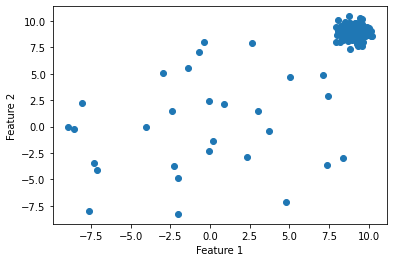

In [63]:
#Separate the two features
f1 = X_train[:,[0]].reshape(-1,1)
f2 = X_train[:,[1]].reshape(-1,1)
#Visualising dataset
#create a meshgrid
xx,yy = np.meshgrid(np.linspace(-10,10,200),np.linspace(-10,10,200))
#Scatter plot

plt.scatter(f1,f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [66]:
#Training the Classifier
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train,Y_train)
#You can print this to see all the prediction scores

scores_pred = clf.decision_function(X_train)*-1
Y_pred = clf.predict(X_train)
n_error = (Y_pred != Y_train).sum()
#Counting the number of errors
print('The number of prediction errors are '+str(n_error))

The number of prediction errors are 0


/usr/local/lib/python3.7/dist-packages/pyod/models/base.py:411: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


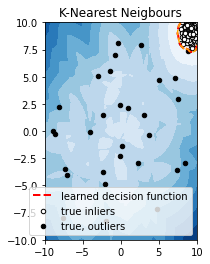

In [67]:
#threshold value to consider a
#datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred ,100*outlier_fraction)
#decision function calculates the raw 
#anomaly more for every point
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])*-1
Z = Z.reshape(xx.shape)
#fill blue colormap from minimum anomaly
#score to threshold value 
subplot = plt.subplot(1,2,1)
subplot.contourf(xx,yy,Z,levels = np.linspace(Z.min(),threshold,10),cmap = plt.cm.Blues_r)
#Draw red contour line where anomaly
#Score is equal to threshold
a = subplot.contour(xx,yy,Z,levels = [threshold],linewidths = 2,colors = 'red')
#fill Orange lines where range of anomaly
#score is from threshold to maximum anoaly score 
subplot.contour(xx,yy,Z,levels  = [threshold,Z.max()],colors = 'orange')
#Scatter plot of liners with white dots
b = subplot.scatter(X_train[:-n_outliers,0],X_train[:-n_outliers,1],c = 'white',s = 20,edgecolor = 'k')
#Scatter plot of outliers with black dots
c = subplot.scatter(X_train[-n_outliers:,0],X_train[-n_outliers:,1],c = 'black',s = 20,edgecolor = 'k')
subplot.axis('tight')
subplot.legend(
    [a.collections[0],b,c],
    ['learned decision function','true inliers','true, outliers'],
    prop = matplotlib.font_manager.FontProperties(size = 10),
    loc  = 'lower right')
subplot.set_title('K-Nearest Neigbours')
subplot.set_xlim((-10,10))
subplot.set_ylim((-10,10))
plt.show()